In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [26]:
df=pd.read_csv("C:/Users/Hp/Documents/Datasets/electric_production.csv")
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [3]:
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst = True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


(397, 2)

Text(0.5, 1.0, 'line chart')

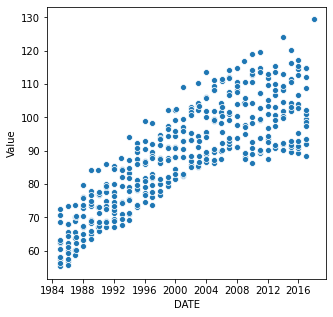

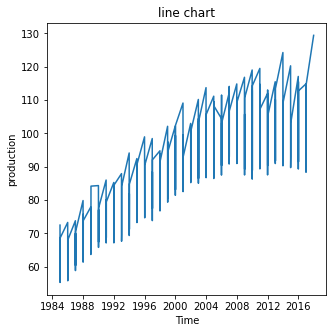

In [4]:
plt.figure(figsize=(5,5))
sns.scatterplot(df["DATE"],df["Value"],data=df)
plt.figure(figsize=(5,5))
plt.plot(df["DATE"],df["Value"])
plt.xlabel("Time")
plt.ylabel("production")
plt.title("line chart")

In [5]:
# test for stationarity of data
from statsmodels.tsa.stattools import adfuller
print("Test for stationarity")
test=adfuller(df['Value'],autolag='AIC')
print("Test statistic is %f" %test[0])
print(test[1])
if (test[1]>0.05):
    print("Data is not stationary")
else:
    print("Stationarity achieved")

Test for stationarity
Test statistic is -2.256990
0.1862146911658708
Data is not stationary


In [6]:
ts=df.groupby(["DATE"])["Value"].sum()
val=[]
interval=1
for i in range(1,len(ts)):
    diff=df['Value'][i]-df['Value'][i-interval]
    val.append(diff)

Text(0.5, 1.0, 'line chart')

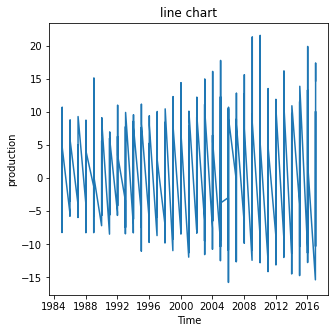

In [13]:
plt.figure(figsize=(5,5))
plt.plot(df.iloc[:396,0:1],val)
plt.xlabel("Time")
plt.ylabel("production")
plt.title("line chart")

In [14]:
# test for stationarity of data
from statsmodels.tsa.stattools import adfuller
print("Test for stationarity")
test=adfuller(val,autolag='AIC')
print("Test statistic is %f" %test[0])
print(test[1])
if (test[1]>0.05):
    print("Data is not stationary")
else:
    print("Stationarity achieved")

Test for stationarity
Test statistic is -7.104891
4.077786565539053e-10
Stationarity achieved


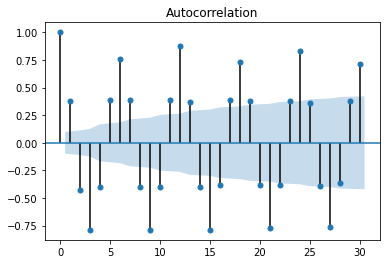

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
arr=np.array(val)
plot_acf(arr,lags=30)
plt.show()

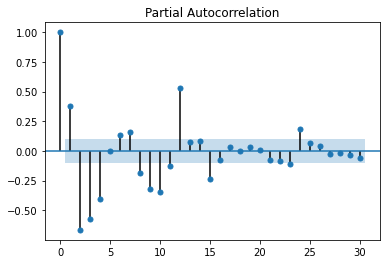

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(arr,lags=30)
plt.show()

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
auto_arima(val,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2104.161, Time=1.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2748.185, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2493.119, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2235.016, Time=0.40 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.38 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.68 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2219.926, Time=0.62 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2102.938, Time=0.46 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2504.0

ARIMA(order=(4, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [41]:
#df1=list(zip(df['DATE'],arr))
#df2=pd.DataFrame(df1,columns=['Date','value'])
train=df.iloc[:300]
test=df.iloc[300:]
model=ARIMA(train['Value'],order=(4,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  300
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -767.015
Date:                Tue, 15 Dec 2020   AIC                           1548.029
Time:                        22:32:22   BIC                           1573.932
Sample:                             0   HQIC                          1558.397
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7588      0.060     12.727      0.000       0.642       0.876
ar.L2         -0.9931      0.070    -14.249      0.000      -1.130      -0.857
ar.L3         -0.0067      0.070     -0.097      0.923      -0.143       0.130
ar.L4         -0.2335      0.061     -3.836      0.000      -0.353      -0.114
ma.L1         -0.9381      0.018    -52.881      0.000      -0.973      -0.903
ma.L2          0.9874      0.025     39.265      0.000       0.938       1.037
sigma2         9.5744      0.694     13.806      0.000       8.215      10.934
===================================================================================
Ljung-Box (Q):                      376.68   Jarque-Bera (JB):                18.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end)

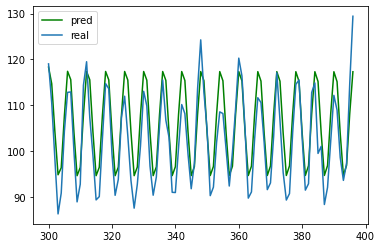

In [43]:
plt.plot(pred,color='g')
plt.plot(test['Value'])
plt.legend(['pred','real'])
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(pred,test['Value'])
print(error)
from sklearn.metrics import r2_score
r2=r2_score(test['Value'],pred)
r2

29.283843285406576


0.6967925418662644